In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
from helpers import *

In [3]:
def scale_ffts(img):
    max_value = np.max(img)
    img_copy = (255/np.log(1 + max_value))*np.log(1 + img)
    return img_copy

# **Now For Real Image**

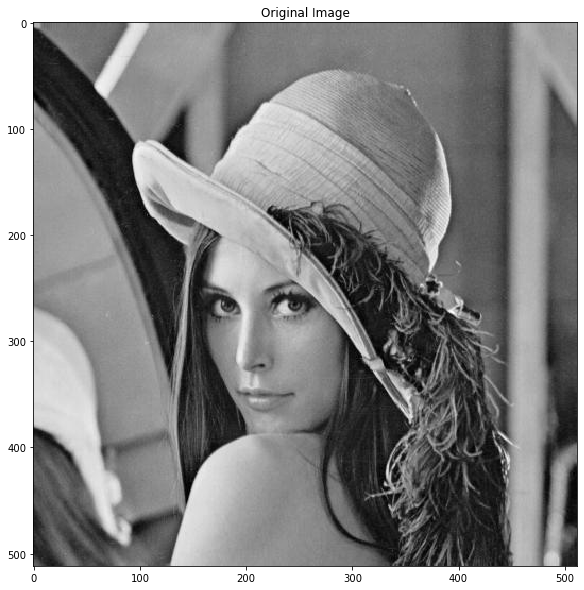

In [4]:
img = cv2.imread("Images/lenna_grayscale.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fft_size = (2048,2048)
plt.figure(figsize = (10,10))
plt.title("Original Image")
imshow_gray(img, vmax=None, vmin=None)

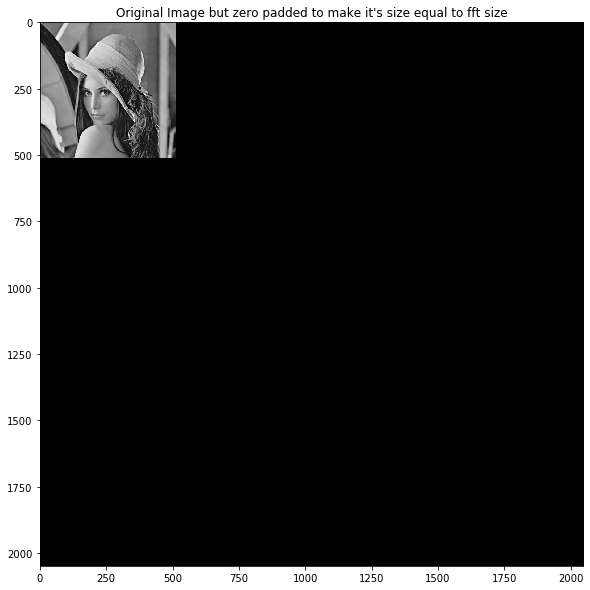

In [5]:
zero_pad_img = np.zeros(fft_size, dtype=np.int)
zero_pad_img[:img.shape[0],:img.shape[1]] = img
plt.figure(figsize = (10,10))
plt.title("Original Image but zero padded to make it's size equal to fft size")
imshow_gray(zero_pad_img, vmin=None, vmax=None)

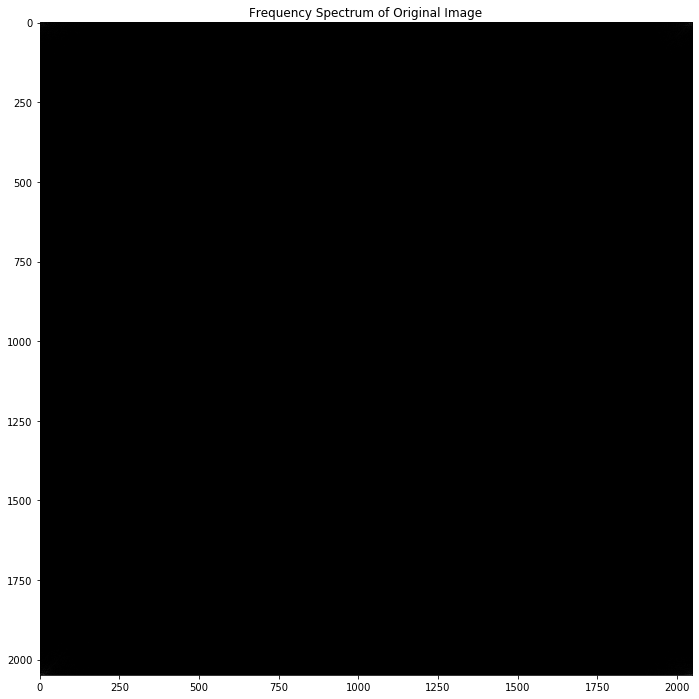

In [6]:
fft_image = sp.fft.fft2(img,s=fft_size)
fft_spectrum = np.abs(fft_image)

plt.figure(figsize = (12,12))
plt.title("Frequency Spectrum of Original Image")
imshow_gray(fft_spectrum, vmin=None, vmax=None)

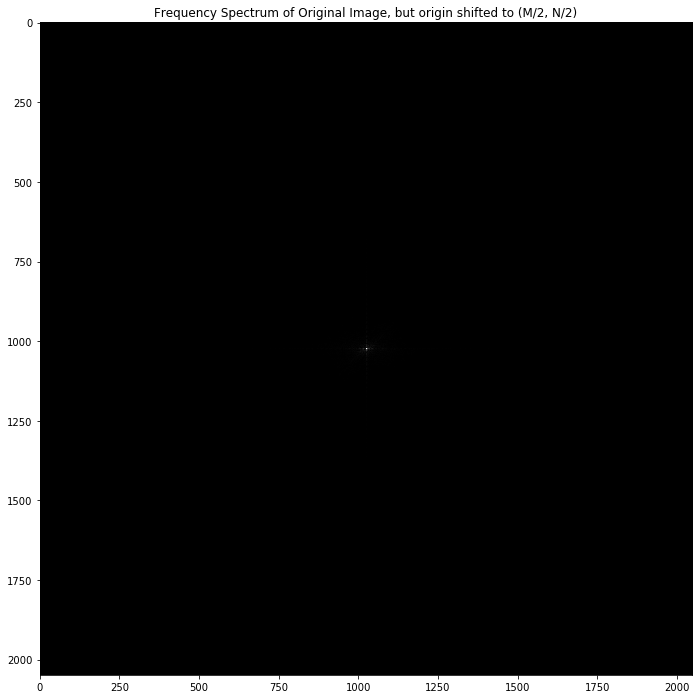

In [7]:
plt.figure(figsize = (12,12))
plt.title("Frequency Spectrum of Original Image, but origin shifted to (M/2, N/2)")
imshow_gray(sp.fft.fftshift(fft_spectrum), vmin=None, vmax=None)

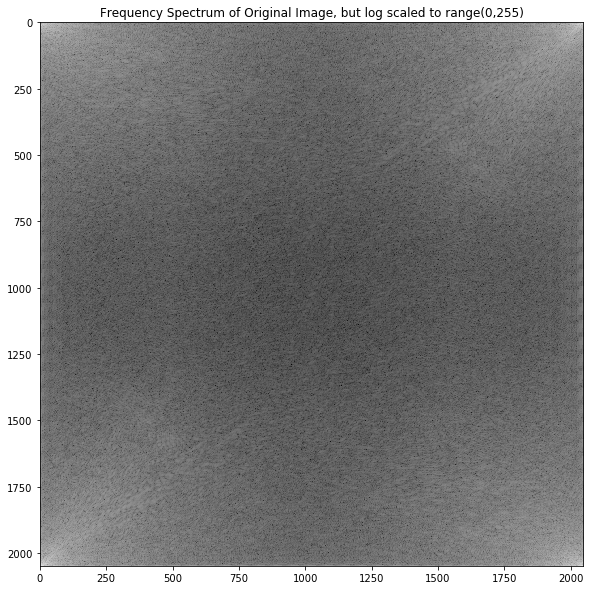

In [8]:
plt.figure(figsize = (10,10))

fft_scaled = scale_ffts(fft_spectrum)
plt.title("Frequency Spectrum of Original Image, but log scaled to range(0,255)")
imshow_gray(fft_scaled, vmin=None, vmax=None)

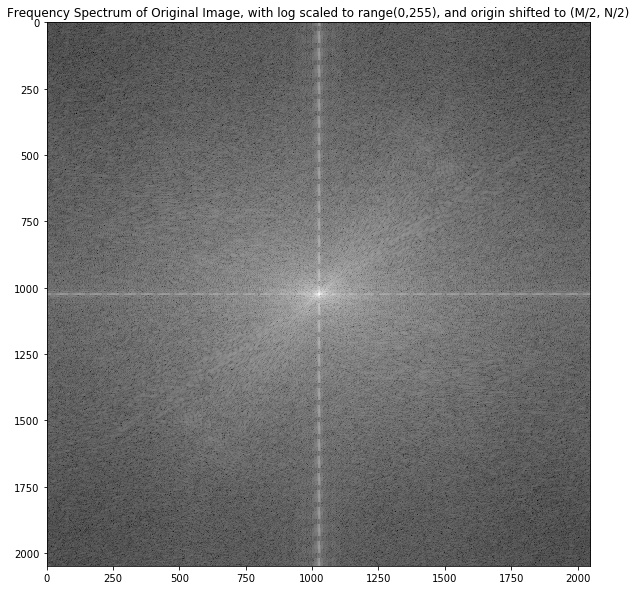

In [9]:
plt.figure(figsize = (10,10))
plt.title("Frequency Spectrum of Original Image, with log scaled to range(0,255), and origin shifted to (M/2, N/2)")
imshow_gray(sp.fft.fftshift(fft_scaled), vmin=None, vmax=None)

# **Now Applying Laplacian Filter**

In [10]:
u, v = np.indices(fft_image.shape)
u, v = u-fft_image.shape[0]/2, v- fft_image.shape[1]/2

In [11]:
u_pow2, v_pow2 = np.power(u,2), np.power(v,2)

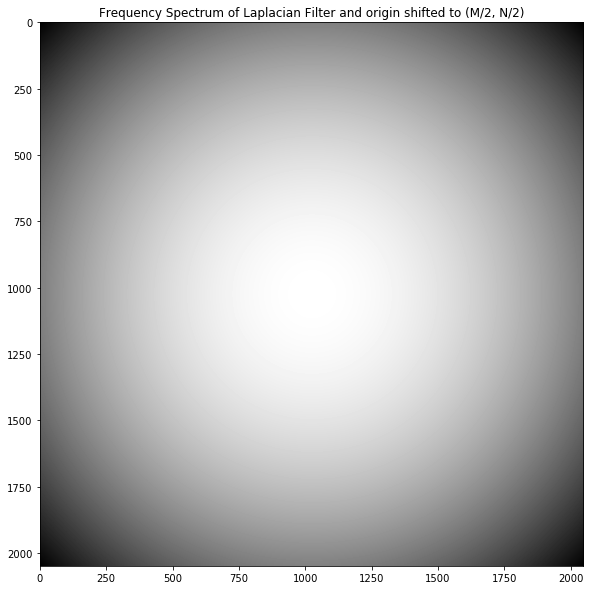

In [12]:
plt.figure(figsize = (10,10))
plt.title("Frequency Spectrum of Laplacian Filter and origin shifted to (M/2, N/2)")
h_uv = (-2*np.power(np.pi, 2))*(u_pow2 + v_pow2)
imshow_gray(h_uv, vmin=None, vmax=None)

In [13]:
fft_edge = h_uv*sp.fft.fftshift(fft_image)

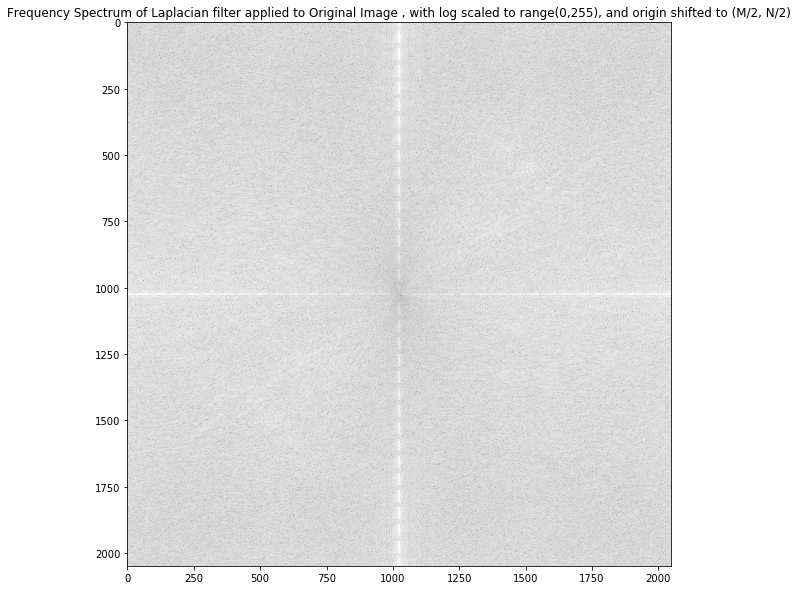

In [14]:
fft_edge_spectrum = np.abs(fft_edge)
fft_edge_scaled = scale_ffts(fft_edge_spectrum)

plt.figure(figsize = (10,10))
plt.title("Frequency Spectrum of Laplacian filter applied to Original Image , with log scaled to range(0,255), and origin shifted to (M/2, N/2)")
imshow_gray(np.abs(fft_edge_scaled), vmin=None, vmax=None)

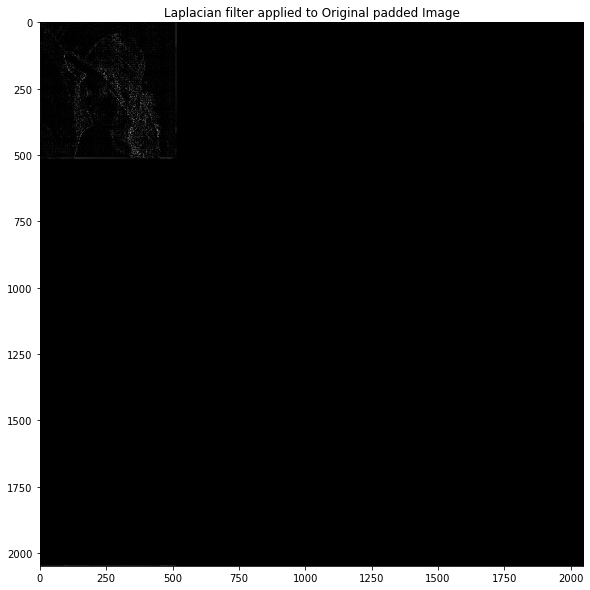

In [34]:
edge_image_ifft = sp.fft.ifft2(fft_edge)
edge_real = np.abs(edge_image_ifft)

plt.figure(figsize = (10,10))
plt.title("Laplacian filter applied to Original padded Image")
imshow_gray(edge_real, vmin=None, vmax=None)

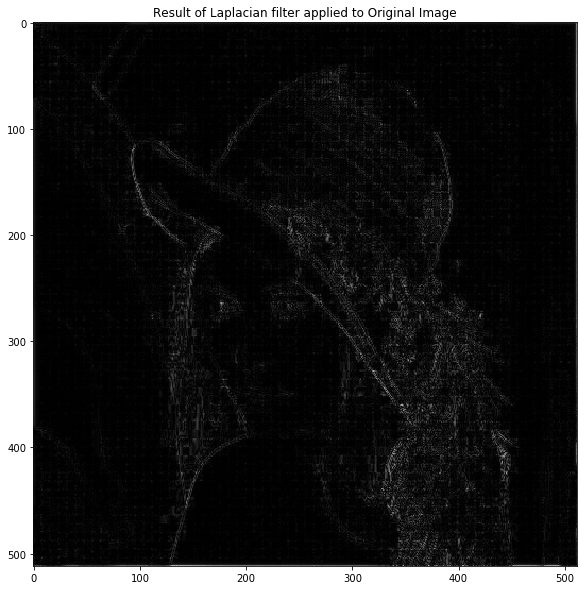

In [35]:
edge_image_original_size = edge_real[0:img.shape[0], 0:img.shape[1]]

# laplacian_of_image = scale_ffts(edge_image_original_size)
laplacian_of_image = edge_image_original_size
                                     
plt.figure(figsize = (10,10))
plt.title("Result of Laplacian filter applied to Original Image")
imshow_gray(laplacian_of_image, vmin=None, vmax=None)